## Importing Libraries

In [267]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
import numpy as np
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from scipy import stats

## Loading Dataset

In [104]:
data = pd.read_csv('yellow_tripdata_2020-01.csv')

In [105]:
df = data.copy()

In [106]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


## Exploratory Data Analysis

### Viewing the shape and data types of the data set

In [107]:
df.shape

(6405008, 18)

In [108]:
df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

### Convert the pickup and drop off time to dates and use these columns to find the duration of each ride.

In [109]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

In [110]:
df['duration_min'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60


In [111]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration_min
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0,2.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0,31.000000
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0,76.000000
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0,27.833333
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0,22.650000


### Filter the columns to select the features of interest

In [112]:
filter_columns = ['passenger_count', 'payment_type', 'fare_amount', 'trip_distance', 'duration_min']
filtered_df = df[filter_columns]
filtered_df

,passenger_count,payment_type,fare_amount,trip_distance,duration_min
0,1.0,1.0,6.00,1.20,4.800000
1,1.0,1.0,7.00,1.20,7.416667
2,1.0,1.0,6.00,0.60,6.183333
3,1.0,1.0,5.50,0.80,4.850000
4,1.0,2.0,3.50,0.00,2.300000
...,...,...,...,...,...
6405003,NaN,NaN,17.59,3.24,31.000000
6405004,NaN,NaN,46.67,22.13,76.000000
6405005,NaN,NaN,48.85,10.51,27.833333
6405006,NaN,NaN,27.17,5.49,22.650000


### About 1% of the passenger counts and payment types are null, I decided to drop these rows because I still maintained a large portion of the data

In [113]:
filtered_df.isna().sum() / filtered_df.shape[0]

passenger_count    0.010217
payment_type       0.010217
fare_amount        0.000000
trip_distance      0.000000
duration_min       0.000000
dtype: float64

In [114]:
filtered_df.dropna(inplace=True)

In [115]:
filtered_df

,passenger_count,payment_type,fare_amount,trip_distance,duration_min
0,1.0,1.0,6.0,1.20,4.800000
1,1.0,1.0,7.0,1.20,7.416667
2,1.0,1.0,6.0,0.60,6.183333
3,1.0,1.0,5.5,0.80,4.850000
4,1.0,2.0,3.5,0.00,2.300000
...,...,...,...,...,...
6339562,1.0,1.0,11.0,2.10,14.233333
6339563,1.0,1.0,13.0,2.13,19.000000
6339564,1.0,1.0,12.5,2.55,16.283333
6339565,1.0,2.0,8.5,1.61,9.633333


### Data type conversions (passenger count is always an interger, and payment type is categorical which is also always an integer)

In [116]:
filtered_df['passenger_count'] = filtered_df['passenger_count'].astype(np.int64)
filtered_df['payment_type'] = filtered_df['payment_type'].astype(np.int64)

### About half of the data set is filled with duplicated rows which will not help out analysis, so I will drop them.

In [117]:
filtered_df.duplicated().sum()

3331706

In [118]:
filtered_df.drop_duplicates(inplace=True)

### The distribution of passengers is mainly focused on 1 and 2. It is interesting that about 2% of the rides do not have a passenger. Riders calling for a taxi and not riding seems to be relevant. 

In [119]:
filtered_df['passenger_count'].value_counts(normalize=True)

passenger_count
1    0.581981
2    0.190350
3    0.066360
5    0.062937
6    0.039272
4    0.036046
0    0.023033
7    0.000009
9    0.000006
8    0.000006
Name: proportion, dtype: float64

In [120]:
filtered_df['payment_type'].value_counts()

payment_type
1    2040133
2     925137
3      26233
4      16357
5          1
Name: count, dtype: int64

### Since the payment types are heavily focused on types 1 and 2, and passenger count under 6 still maintains most of the data and a passenger count of 0 may negatively impact the data quality, I will use this information to filter the data set again

In [121]:
filter1 = (filtered_df['payment_type'] < 3)
filter2 = (filtered_df['passenger_count'] < 6) & (filtered_df['passenger_count'] > 0)
filtered_df = filtered_df[filter1 & filter2]

In [122]:
filtered_df.shape

(2780283, 5)

In [123]:
filtered_df['payment_type'] = filtered_df['payment_type'].map({1:'card', 2:'cash'})

In [124]:
filtered_df

,passenger_count,payment_type,fare_amount,trip_distance,duration_min
0,1,card,6.0,1.20,4.800000
1,1,card,7.0,1.20,7.416667
2,1,card,6.0,0.60,6.183333
3,1,card,5.5,0.80,4.850000
4,1,cash,3.5,0.00,2.300000
...,...,...,...,...,...
6339555,3,card,10.0,2.09,14.800000
6339561,1,card,17.5,4.11,21.500000
6339563,1,card,13.0,2.13,19.000000
6339564,1,card,12.5,2.55,16.283333


### Using the describe method, some issues we find are:
##### -the fare amount, trip distance, and duration contains negative values which may indicate errors in data entry
##### -the maximum in the fair amount, trip distance, and duration are much larger than the 75 percentile, which may indicate the prescence of outliers.

In [125]:
filtered_df.describe()

,passenger_count,fare_amount,trip_distance,duration_min
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,1.780567e+01,4.536729e+00,2.415478e+01
std,1.176652e+00,1.506997e+01,4.895890e+00,9.260031e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,9.000000e+00,1.500000e+00,9.883333e+00
50%,1.000000e+00,1.300000e+01,2.730000e+00,1.573333e+01
75%,2.000000e+00,2.100000e+01,5.470000e+00,2.336667e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


In [126]:
filter = (filtered_df['fare_amount'] > 0) & (filtered_df['trip_distance'] > 0) & (filtered_df['duration_min'] > 0)
filtered_df = filtered_df[filter]
filtered_df.shape

(2748932, 5)

In [127]:
filtered_df.describe()

,passenger_count,fare_amount,trip_distance,duration_min
count,2.748932e+06,2.748932e+06,2.748932e+06,2.748932e+06
mean,1.738151e+00,1.766835e+01,4.583313e+00,2.418261e+01
std,1.179440e+00,1.447531e+01,4.897806e+00,9.272285e+01
min,1.000000e+00,1.000000e-02,1.000000e-02,1.666667e-02
25%,1.000000e+00,9.000000e+00,1.530000e+00,9.950000e+00
50%,1.000000e+00,1.300000e+01,2.770000e+00,1.575000e+01
75%,2.000000e+00,2.100000e+01,5.500000e+00,2.333333e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


## Visualize the Data

### Outliers are heavily affecting the data visualization

In [163]:
def hist_box(data):
    plt.subplot(121)
    plt.hist(data)
    plt.subplot(122)
    plt.boxplot(data)
    plt.tight_layout()
    plt.show()

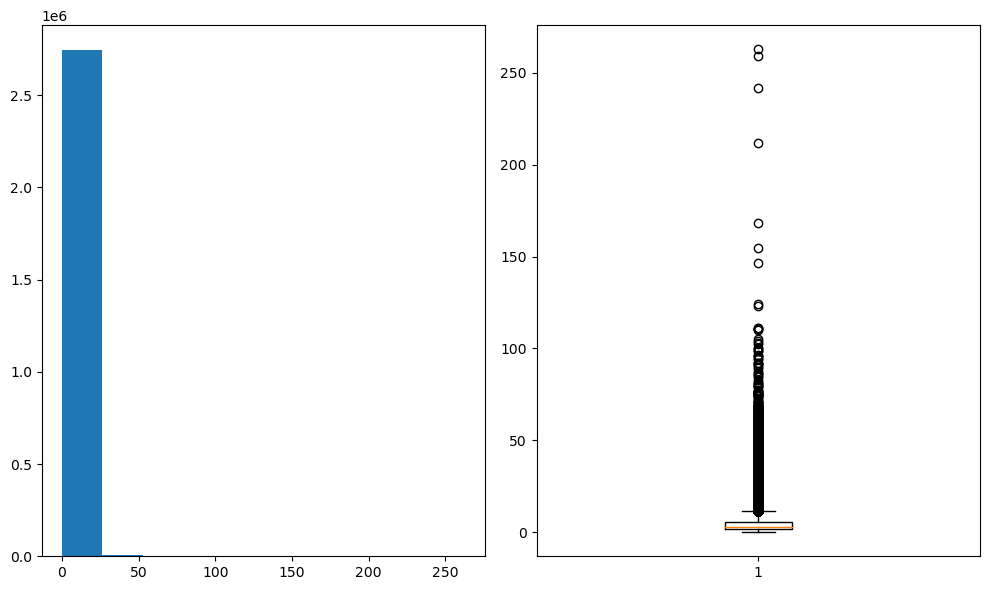

In [130]:
plt.figure(figsize=(10,6))
hist_box(filtered_df['trip_distance'])

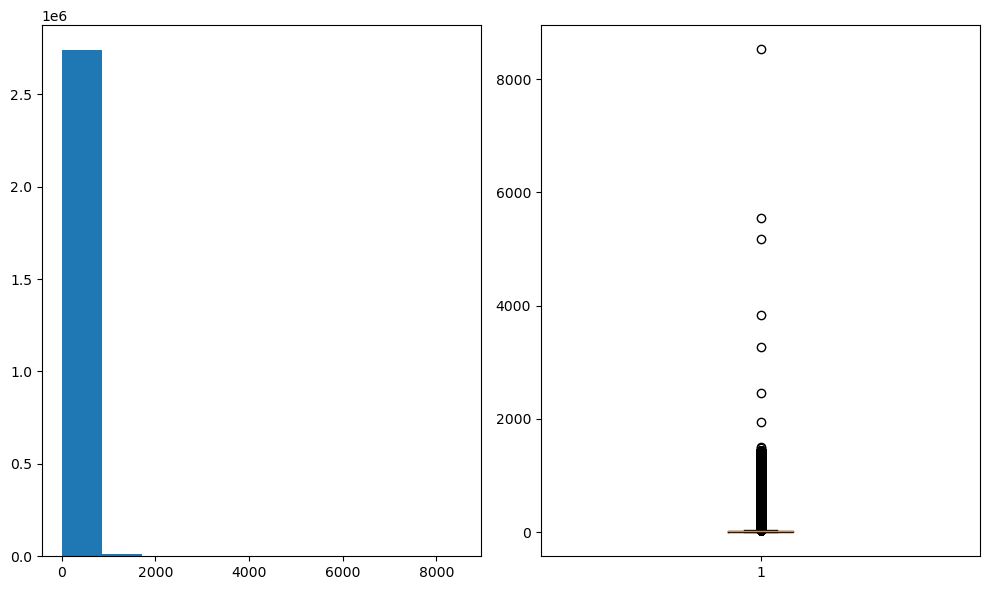

In [131]:
plt.figure(figsize=(10,6))
hist_box(filtered_df['duration_min'])

### With the major impact of outliers, I will use IQR principles to filter these extreme points

In [132]:
filtered_df.columns

Index(['passenger_count', 'payment_type', 'fare_amount', 'trip_distance',
       'duration_min'],
      dtype='object')

In [142]:
for col in ['fare_amount', 'trip_distance', 'duration_min']:
    q1 = filtered_df[col].quantile(.25)
    q3 = filtered_df[col].quantile(.75)
    IQR =  q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    filtered_df = filtered_df[(filtered_df[col] >= lower_bound) & (filtered_df[col] <= upper_bound)]


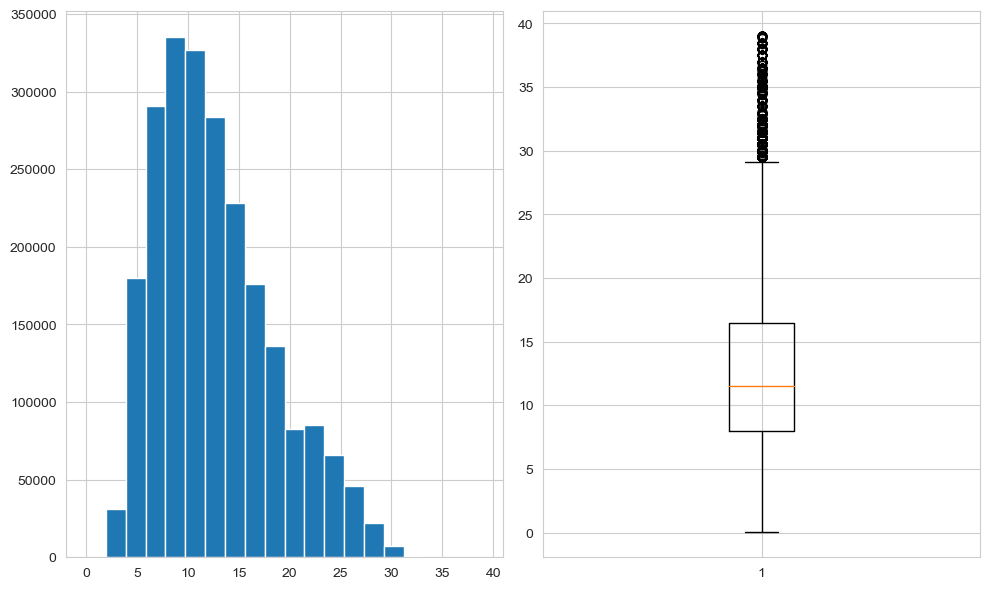

In [165]:
plt.figure(figsize=(10,6))
hist_box(filtered_df['fare_amount'])

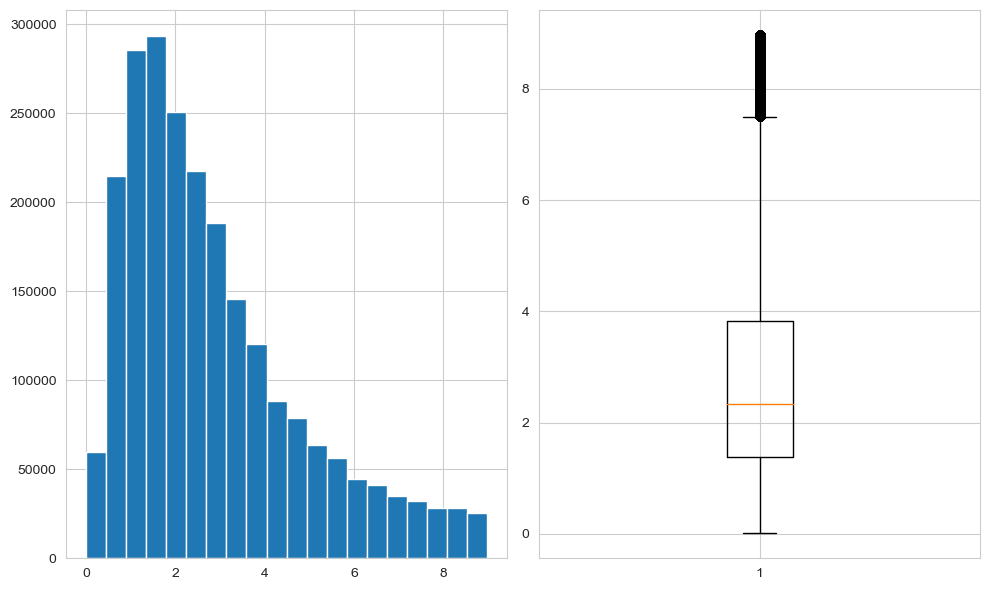

In [166]:
plt.figure(figsize=(10,6))
hist_box(filtered_df['trip_distance'])

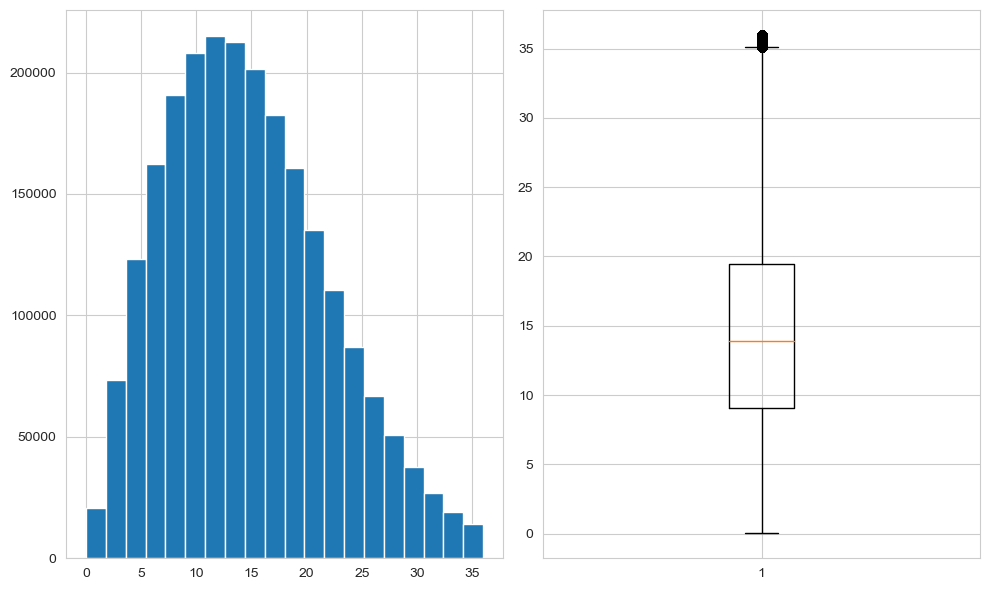

In [167]:
plt.figure(figsize=(10,6))
hist_box(filtered_df['duration_min'])

### The shape of the distrbution of each column is similary whether if it was paid with cash or with card. The mean for each plot is slightly shifter to the left for card column than with cash column 

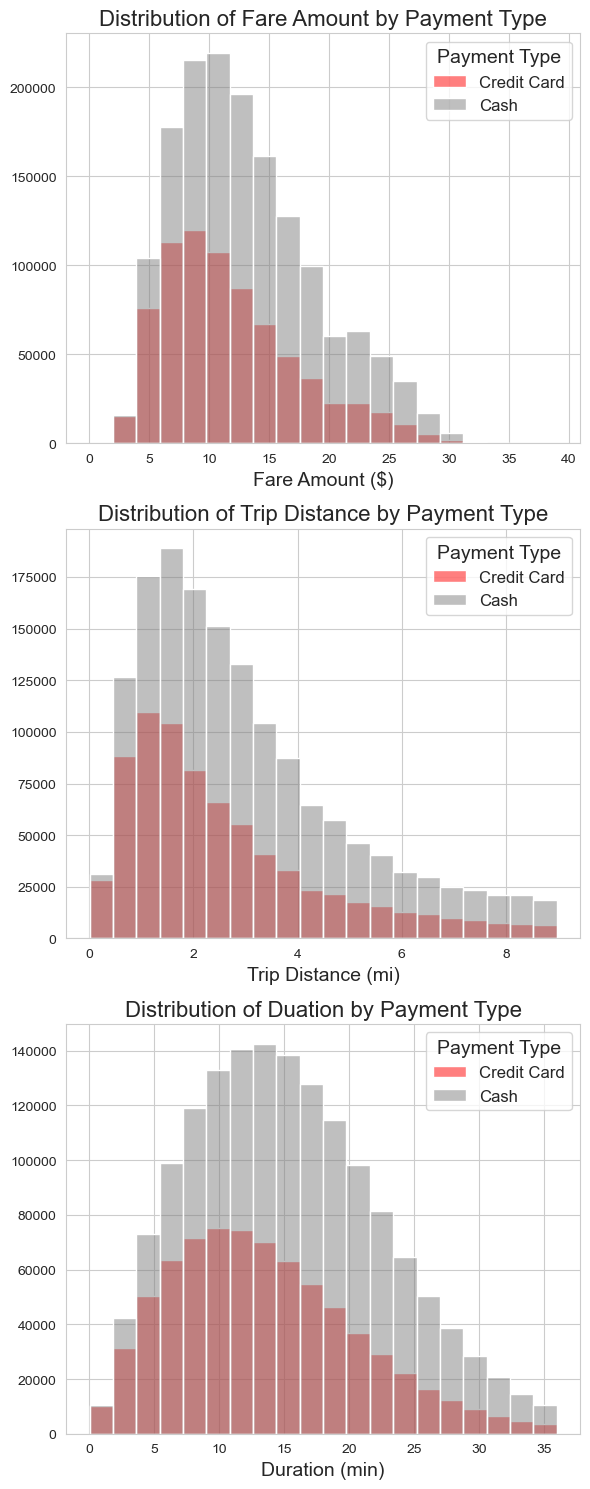

In [160]:
# Set the style
sns.set_style("whitegrid")
plt.figure(figsize = (6,15))

plt.subplot(311)
sns.histplot(data=filtered_df, x='fare_amount', hue='payment_type', bins=20, palette=['gray', 'red'])
plt.xlabel('Fare Amount ($)', fontsize=14)  
plt.ylabel('')
plt.title('Distribution of Fare Amount by Payment Type', fontsize=16)  
plt.legend(title='Payment Type', title_fontsize='14', fontsize='12', labels=['Credit Card', 'Cash']) 

plt.subplot(312)
sns.histplot(data=filtered_df, x='trip_distance', hue='payment_type', bins=20, palette=['gray', 'red'])
plt.xlabel('Trip Distance (mi)', fontsize=14)  
plt.ylabel('')
plt.title('Distribution of Trip Distance by Payment Type', fontsize=16)  
plt.legend(title='Payment Type', title_fontsize='14', fontsize='12', labels=['Credit Card', 'Cash']) 

plt.subplot(313)
sns.histplot(data=filtered_df, x='duration_min', hue='payment_type', bins=20, palette=['gray', 'red'])
plt.xlabel('Duration (min)', fontsize=14)  
plt.ylabel('')
plt.title('Distribution of Duation by Payment Type', fontsize=16)  
plt.legend(title='Payment Type', title_fontsize='14', fontsize='12', labels=['Credit Card', 'Cash'])

plt.tight_layout()
plt.show()

### Apply group by functions to verify the mean shift observation

In [170]:
filtered_df.groupby('payment_type')[['fare_amount','trip_distance', 'duration_min']].agg(['mean', 'std'])

fare_amount           trip_distance          duration_min  \
                    mean       std          mean      std         mean   
payment_type                                                             
card           13.112493  5.849281      2.992237  1.99274    15.225270   
cash           11.758005  5.613038      2.602207  1.91372    13.470292   

                        
                   std  
payment_type            
card          7.349439  
cash          7.099852

### The pie chart shows about 66% of payment are done with cash and the rest with card

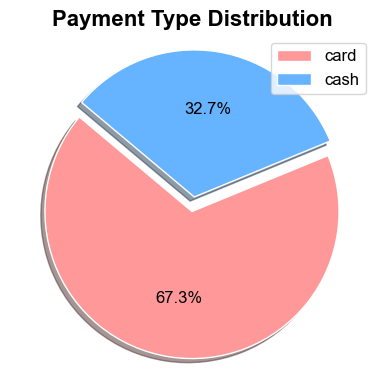

In [179]:
payment_counts = filtered_df['payment_type'].value_counts()

# Custom colors for each payment type
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

# Custom explode to emphasize a specific slice (optional)
explode = (0.1, 0)  

# Create pie chart
plt.figure(figsize=(4, 4))  # Set the figure size
plt.pie(payment_counts,autopct='%1.1f%%', startangle=140, colors=colors, explode=explode, shadow=True)  
plt.title('Payment Type Distribution', fontsize=16, fontweight='bold')  # Add a title with custom font size and weight

# Customize text properties
plt.rcParams['font.size'] = 12  # Set the font size for text labels
plt.rcParams['text.color'] = 'black'  # Set the color for text labels

# Show plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.legend(labels = ['card', 'cash'])
plt.show()

### The bar chart shows that lower passenger count rides dominate the data

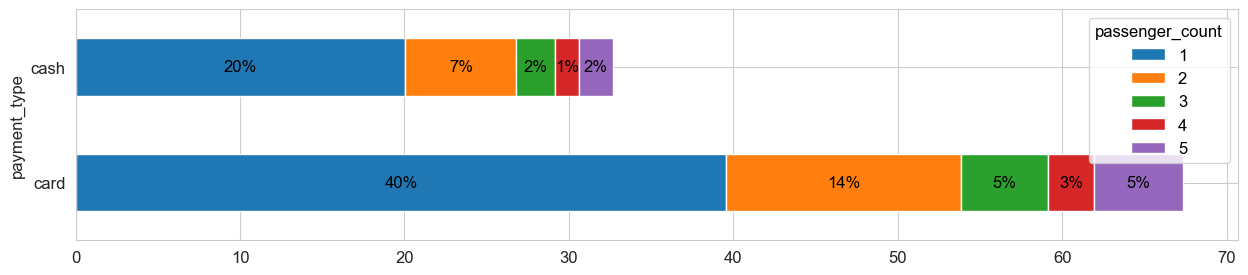

In [255]:
sample_df = (100 * filtered_df.groupby(['payment_type'])['passenger_count'].value_counts() / filtered_df.shape[0]).unstack().reset_index()
fig, ax = plt.subplots(figsize=(15,3))
sample_df.plot( x ='payment_type', kind='barh', stacked=True, ax = ax)
for p in ax.patches:
    w = p.get_width()
    h = p.get_height()
    x, y = p.get_xy()
    ax.text(x + w / 2, y + h / 2,
    '{:.0f}%'.format(w),
    horizontalalignment='center',
    verticalalignment = 'center')

## Hypothesis Testing

### H0: There is not a difference in average fare between customers who use cash and credit card.
### H1: There is a difference in average fare between customers who use cash and credit card.

### The qq plot shows the data for the fare amount is not normally distributed, the previous histograms also show the data is skewed to the right

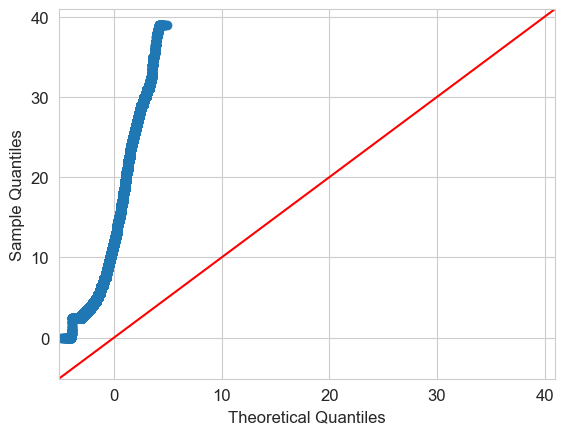

In [266]:
sm.qqplot(filtered_df['fare_amount'], line = '45')
plt.show()

In [263]:
card_sample = filtered_df[filtered_df['payment_type'] == 'card']
cash_sample = filtered_df[filtered_df['payment_type'] == 'cash']

### Since the data is not normally distributed, I decided to use the mann whitney test, since the p-value is below the significance level of 0.05, there is a significant difference in the mean fare amount between cash and credit customers.

In [270]:
t_statistic, p_value = stats.mannwhitneyu(card_sample['fare_amount'], cash_sample['fare_amount'])
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 662377039975.5
p-value: 0.0
